In [1]:
#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# #ML Library
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("brain_stroke.csv")

In [3]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [4]:
df.shape

(4981, 11)

In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
Key Points
Non-Null Count: All columns have 4981 non-null entries, indicating there are no missing values in any column.
Data Types: The data types include float64 for continuous numerical features (age, avg_glucose_level, bmi), int64 for binary numerical features (hypertension, heart_disease, stroke), and object for categorical features (gender, ever_married, work_type, Residence_type, smoking_status).
Memory Usage: The DataFrame occupies approximately 428.2 KB of memory.

In [6]:
#EDA
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
Key Observations
age: Ranges from 0.08 to 82 years, with a mean of approximately 43.42 years.
hypertension: Binary feature with values 0 or 1. The mean of 0.096 indicates that around 9.6% of the individuals have hypertension.
heart_disease: Binary feature with values 0 or 1. The mean of 0.055 indicates that around 5.5% of the individuals have heart disease.
avg_glucose_level: Ranges from 55.12 to 271.74, with a mean of approximately 105.94.
bmi: Ranges from 14.00 to 48.90, with a mean of approximately 28.50.
stroke: Binary feature with values 0 or 1. The mean of 0.050 indicates that around 5% of the individuals have had a stroke.
These statistics provide a concise overview of the distribution and central tendencies of the numerical features in the dataset.

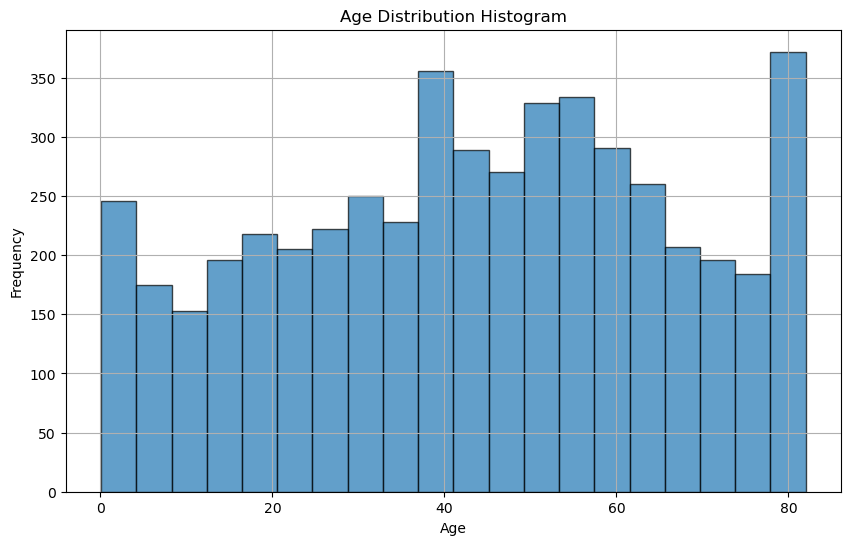

In [9]:
# Crete Histogram of Age
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv' 
data = pd.read_csv(file_path)

# Create a histogram for the "age" variable
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
The age distribution appears to be relatively uniform with some noticeable peaks and troughs.
There are significant peaks around the ages of 40 and 80.
Around age 0-10: There is a moderately high frequency of individuals.
Around age 40: There is a noticeable peak, indicating a high number of individuals around this age.
Around age 80: There is another significant peak, indicating many individuals in this age range.
The dataset includes a wide range of ages from infants to elderly individuals.
The peaks at around age 40 and 80 might indicate larger subgroups within these age ranges in the dataset.
The uniformity and fluctuations in the distribution suggest a diverse dataset with individuals of different ages, without a dominant age group. 

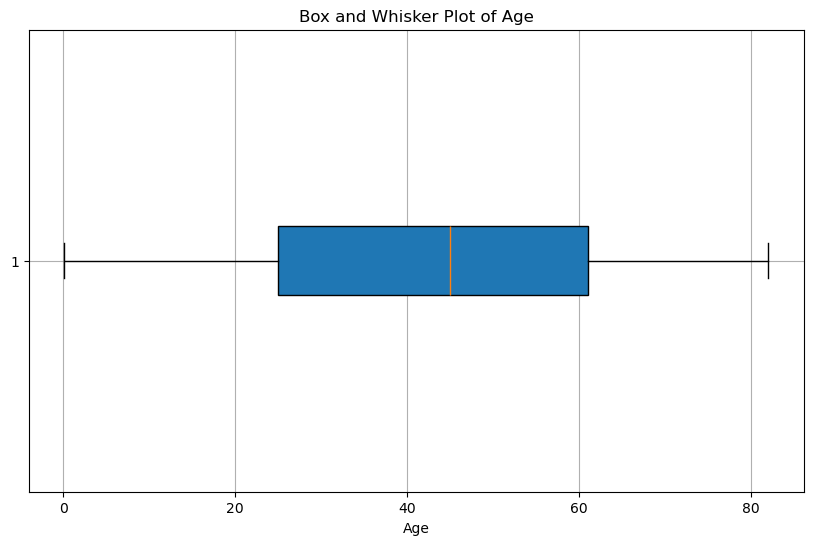

In [11]:
# Crete Box Plot of Age
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv' 
data = pd.read_csv(file_path)

# Create a box and whisker plot for the "age" variable
plt.figure(figsize=(10, 6))
plt.boxplot(data['age'], vert=False, patch_artist=True)
plt.title('Box and Whisker Plot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()


In [ ]:
There are no visible outliers in this plot.
The median age appears to be around 40.
The interquartile range (IQR) spans from approximately 25 to 55.
The minimum and maximum ages range from just above 0 to around 80.
Overall, the plot shows that the majority of ages in this dataset are concentrated between 25 and 55, with a relatively even distribution of ages around the median of 40.

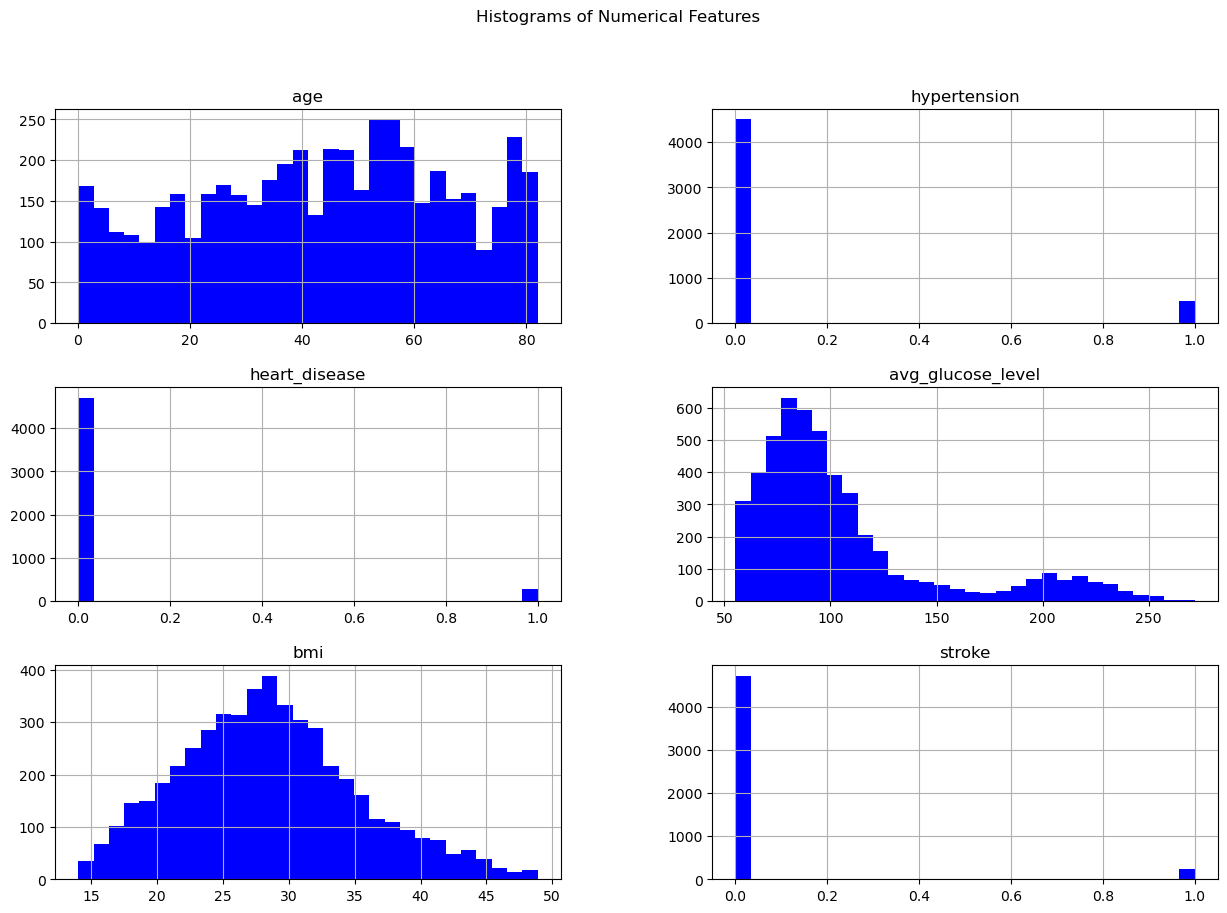

In [12]:
# Un comment this to see histogram of all varibale 

# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Histograms of Numerical Features')
plt.show()


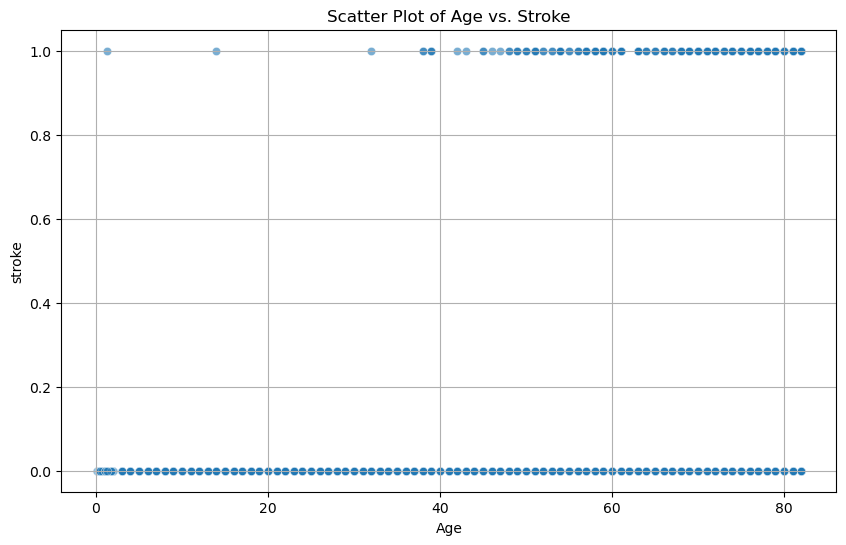

In [13]:
# Draw Scatterplot of stroke and age
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv' 
data = pd.read_csv(file_path)

# Create a scatter plot for "age" vs. "stroke"
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['stroke'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Age vs. Stroke')
plt.xlabel('Age')
plt.ylabel('stroke')
plt.grid(True)
plt.show()

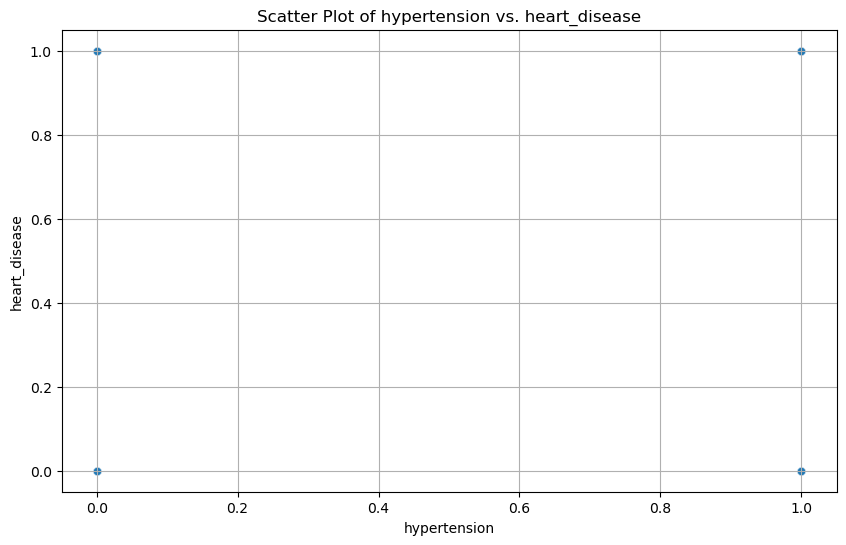

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv'  
data = pd.read_csv(file_path)

# Create a scatter plot for "hypertension" vs. "heart_disease"
plt.figure(figsize=(10, 6))
plt.scatter(data['hypertension'], data['heart_disease'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of hypertension vs. heart_disease')
plt.xlabel('hypertension')
plt.ylabel('heart_disease')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Gender')

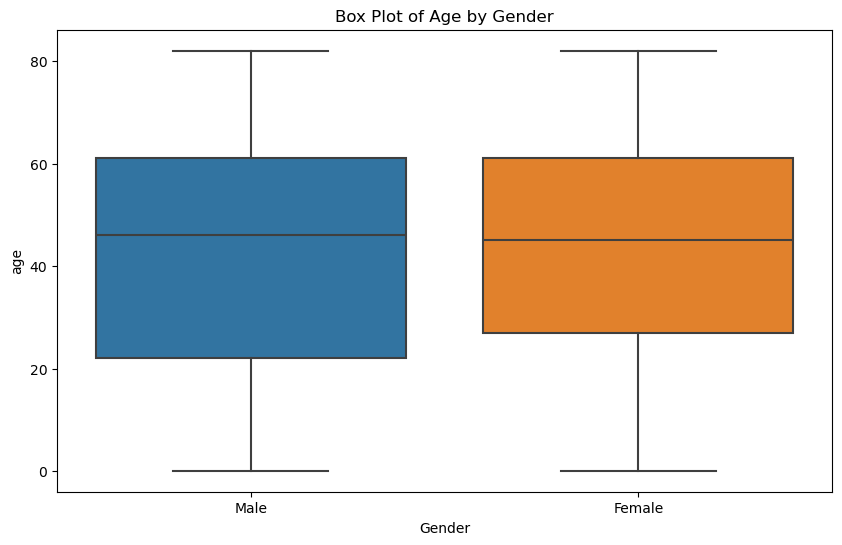

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv' 
data = pd.read_csv(file_path)

# Create a box plot for "age" by "gender"
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="gender", y="age")
plt.title('Box Plot of Age by Gender')
plt.xlabel('Gender')

In [ ]:
Overall, the plot shows that the age distributions for males and females are quite similar, with median ages around 40 and comparable overall ranges. However, there is a slightly wider spread in the middle 50% of the ages for males compared to females.

In [2]:
# # One-Hot Encoding for Correlation Matrix
data_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = data_encoded.corr()

# # Heatmap of correlation matrix
# plt.figure(figsize=(15, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

NameError: name 'pd' is not defined

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv' 
data = pd.read_csv(file_path)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix

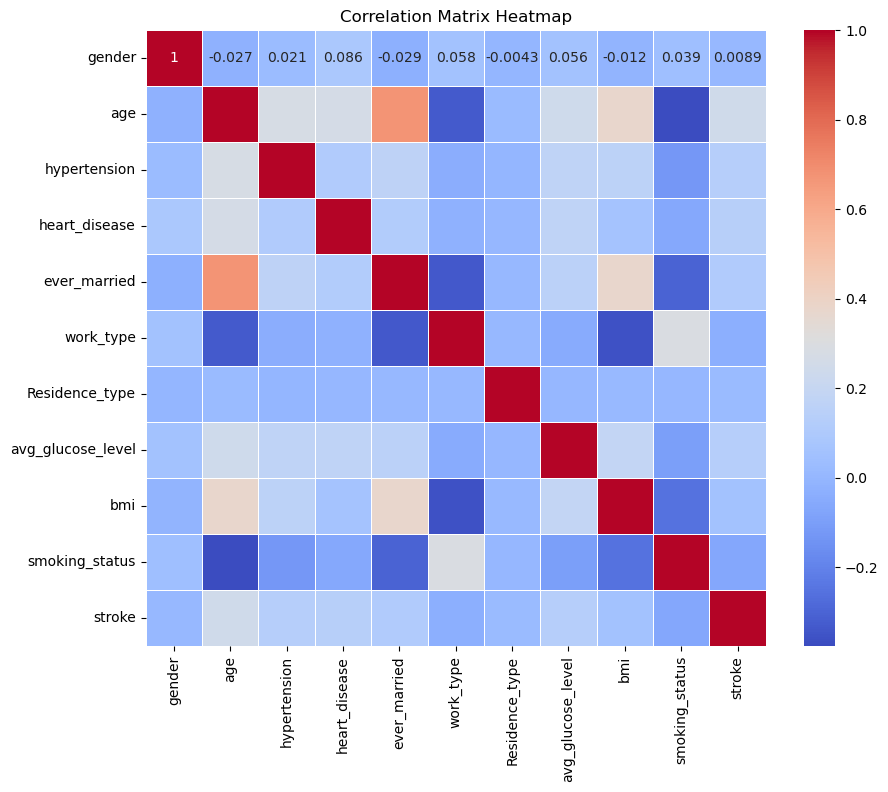

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
file_path = 'brain_stroke.csv'   
data = pd.read_csv(file_path)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
Key Correlations:

Age and Stroke: Positive correlation (around 0.39). Older age is positively correlated with having a stroke.
Hypertension and Stroke: Positive correlation (around 0.12). Hypertension is positively correlated with having a stroke.
Heart Disease and Stroke: Positive correlation (around 0.13). Heart disease is positively correlated with having a stroke.
Avg Glucose Level and Stroke: Positive correlation (around 0.13). Higher average glucose levels are positively correlated with having a stroke.
Smoking Status and Stroke: Positive correlation (around 0.15). Smoking status is positively correlated with having a stroke.
Ever Married and Age: Positive correlation (around 0.58). Older individuals are more likely to have ever been married.
BMI and Avg Glucose Level: Positive correlation (around 0.06). Higher BMI is slightly positively correlated with higher average glucose levels.
Notable Weak or No Correlations:

Gender and Stroke: Very weak or no correlation (around 0.0089). Gender does not significantly correlate with stroke in this dataset.
Residence Type and Stroke: Very weak or no correlation (around -0.012). Residence type does not significantly correlate with stroke in this dataset.
Additional Observations:

Ever Married and Heart Disease: Positive correlation (around 0.12). Being ever married is positively correlated with having heart disease.
Avg Glucose Level and Heart Disease: Positive correlation (around 0.25). Higher average glucose levels are positively correlated with heart disease.
BMI and Age: Positive correlation (around 0.06). Older age is slightly positively correlated with higher BMI.
This heatmap provides a visual summary of how different variables are related to each other, with some notable positive correlations with stroke, such as age, hypertension, heart disease, and smoking status.